In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
#from keras.utils import to_categorical
#importing models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
import warnings
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [14]:
from sklearn.preprocessing import StandardScaler

In [86]:
df = pd.read_csv('Churn_Modelling.csv')

In [87]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [88]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [90]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [91]:
list_drob=['RowNumber','CustomerId','Surname']

In [92]:
df.drop(list_drob,axis=1,inplace=True)

In [93]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
df=pd.get_dummies(df,columns=['Geography','Gender'])

In [95]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


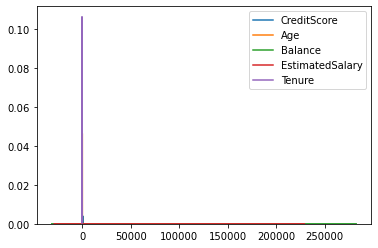

In [96]:
sns.kdeplot(df['CreditScore'], shade=True)
sns.kdeplot(df['Age'], shade=True)
sns.kdeplot(df['Balance'], shade=True)
sns.kdeplot(df['EstimatedSalary'], shade=True)
sns.kdeplot(df['Tenure'], shade=True)


In [97]:
stand= StandardScaler()
for column in ['CreditScore','Age','Balance','EstimatedSalary','Tenure']:
    df[column] = stand.fit_transform(df[column].values.reshape(-1,1))

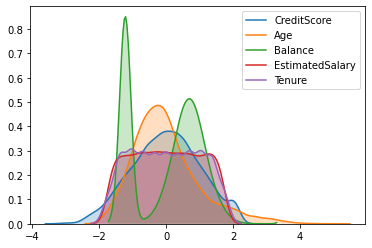

In [98]:
sns.kdeplot(df['CreditScore'], shade=True)
sns.kdeplot(df['Age'], shade=True)
sns.kdeplot(df['Balance'], shade=True)
sns.kdeplot(df['EstimatedSalary'], shade=True)
sns.kdeplot(df['Tenure'], shade=True)

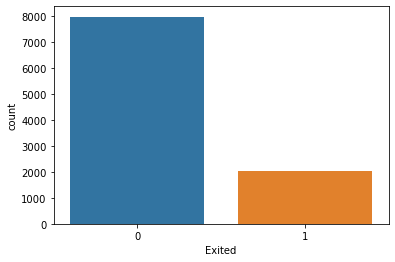

In [99]:
sns.countplot(df['Exited'])

In [100]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [101]:
#splitting data to input and output
X=df.drop('Exited',axis=1) #input
y=df['Exited']  #output(label)

In [102]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,shuffle=True)

In [103]:
print(X.shape)
print(y.shape)

(10000, 13)
(10000,)


In [104]:
print(' X_train.shape : ',X_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',X_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (8000, 13)
 y_train.shape :  (8000,)
 X_test.shape :  (2000, 13)
 y_test.shape :  (2000,)


# deep learning ANN

In [105]:
model = Sequential()
model.add(Dense(6, input_dim=13, activation='relu'))

model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 84        
                                                                 
 dense_16 (Dense)            (None, 5)                 35        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [107]:
history=model.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.15)

Epoch 1/100
680/680 [==============================] - 1s 907us/step - loss: 0.3471 - accuracy: 0.8535 - val_loss: 0.3821 - val_accuracy: 0.8392
Epoch 2/100
680/680 [==============================] - 1s 1ms/step - loss: 0.3458 - accuracy: 0.8575 - val_loss: 0.3759 - val_accuracy: 0.8467
Epoch 3/100
680/680 [==============================] - 1s 940us/step - loss: 0.3433 - accuracy: 0.8565 - val_loss: 0.3784 - val_accuracy: 0.8392
Epoch 4/100
680/680 [==============================] - 1s 959us/step - loss: 0.3435 - accuracy: 0.8575 - val_loss: 0.3771 - val_accuracy: 0.8450
Epoch 5/100
680/680 [==============================] - 1s 944us/step - loss: 0.3426 - accuracy: 0.8569 - val_loss: 0.3735 - val_accuracy: 0.8450
Epoch 6/100
680/680 [==============================] - 1s 981us/step - loss: 0.3419 - accuracy: 0.8591 - val_loss: 0.3709 - val_accuracy: 0.8458
Epoch 7/100
680/680 [==============================] - 1s 957us/step - loss: 0.3415 - accuracy: 0.8559 - val_loss: 0.3707 - val_accu

680/680 [==============================] - 1s 908us/step - loss: 0.3248 - accuracy: 0.8675 - val_loss: 0.3555 - val_accuracy: 0.8492
Epoch 58/100
680/680 [==============================] - 1s 906us/step - loss: 0.3246 - accuracy: 0.8663 - val_loss: 0.3540 - val_accuracy: 0.8542
Epoch 59/100
680/680 [==============================] - 1s 921us/step - loss: 0.3246 - accuracy: 0.8674 - val_loss: 0.3570 - val_accuracy: 0.8517
Epoch 60/100
680/680 [==============================] - 1s 903us/step - loss: 0.3247 - accuracy: 0.8672 - val_loss: 0.3546 - val_accuracy: 0.8583
Epoch 61/100
680/680 [==============================] - 1s 911us/step - loss: 0.3250 - accuracy: 0.8651 - val_loss: 0.3615 - val_accuracy: 0.8533
Epoch 62/100
680/680 [==============================] - 1s 932us/step - loss: 0.3247 - accuracy: 0.8663 - val_loss: 0.3619 - val_accuracy: 0.8467
Epoch 63/100
680/680 [==============================] - 1s 907us/step - loss: 0.3235 - accuracy: 0.8672 - val_loss: 0.3620 - val_accuracy

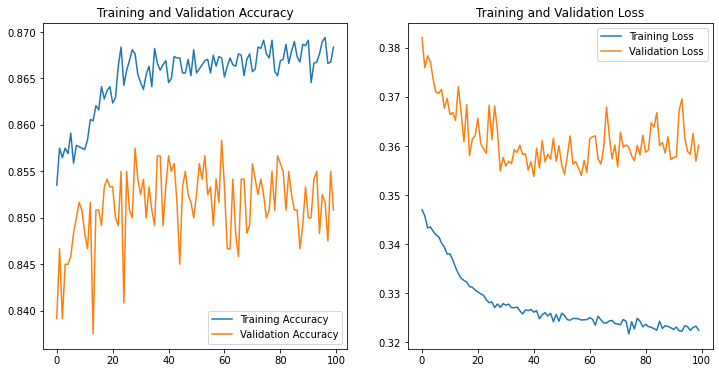

In [108]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [110]:
cm

array([[1391,  195],
       [ 375,   39]], dtype=int64)

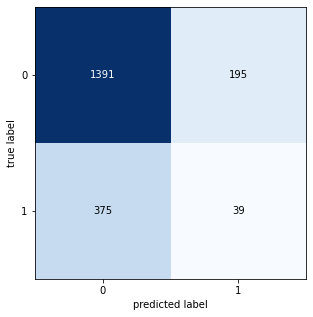

In [111]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()